In [26]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Reusable functions


# Perform discrete convolution to calculate the probability distribution of the sum S
def convolve_distributions(distributions):
    result = distributions[0]
    for dist in distributions[1:]:
        result = np.convolve(result, dist)
    return result


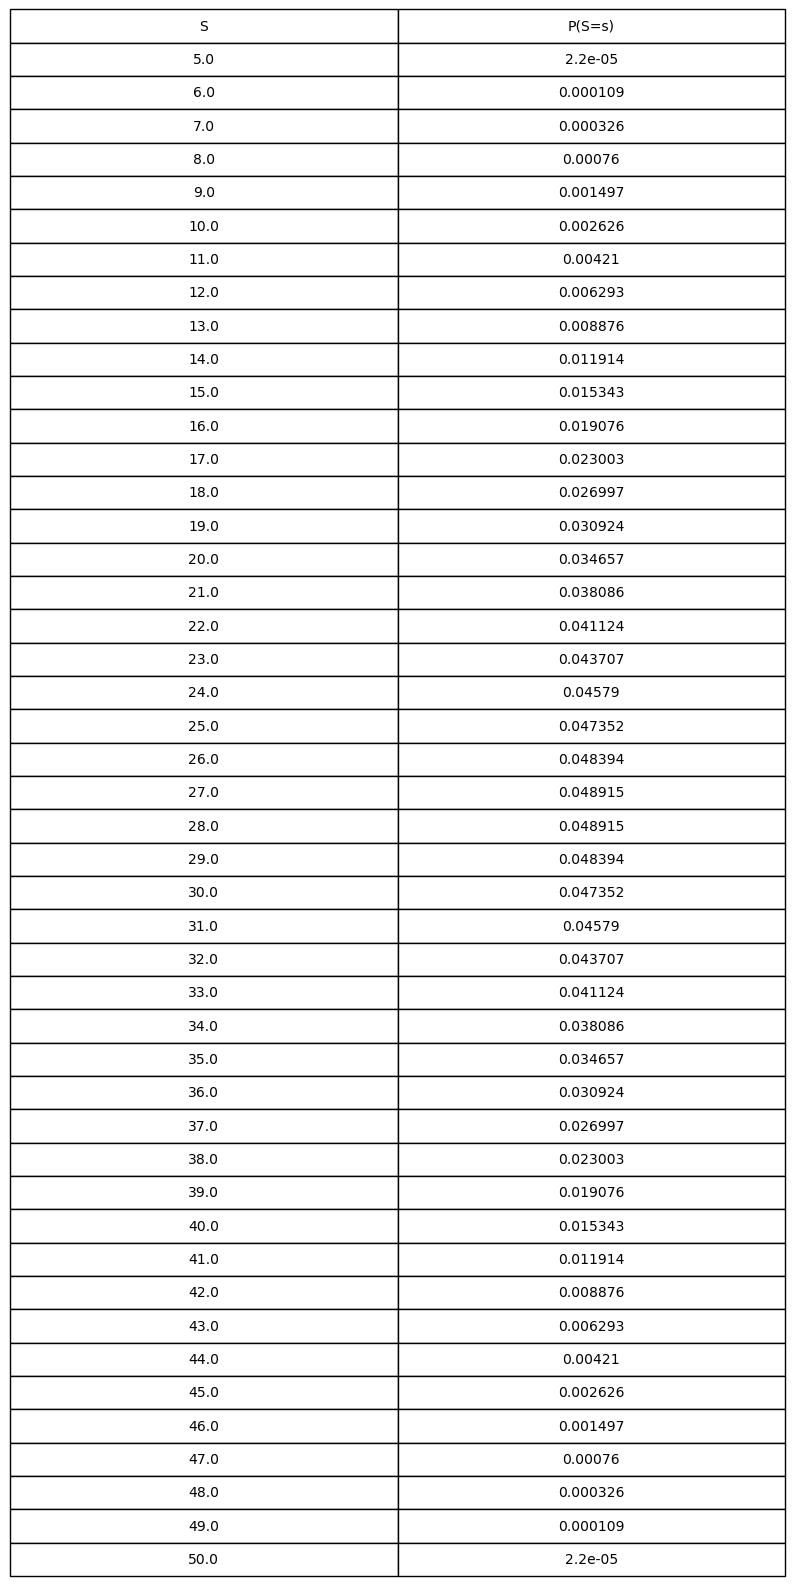

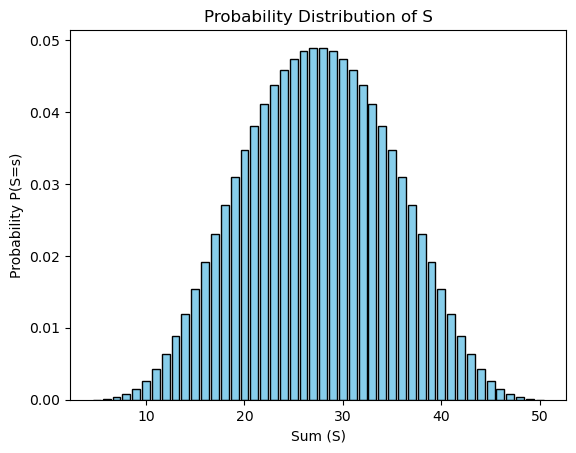

In [33]:
# Task 1

# Define the number of faces on each die
# Tetrahedron (4), Cube (6), Octahedron (8), Dodecahedron (12), Icosahedron (20)
dice_faces = [4, 6, 8, 12, 20] 

# Create the initial probability distribution for each die (uniform distribution)
distributions = [np.ones(face) / face for face in dice_faces]

# Calculate the probability distribution of the sum S
probability_S = convolve_distributions(distributions)

# The sum ranges from 5 to 50
possible_sums = np.arange(5, 51)

# Create a table for the probability distribution
probability_table = np.column_stack((possible_sums, probability_S))

# Create a DataFrame to display as a table
df = pd.DataFrame(probability_table, columns=['S', 'P(S=s)'])


df['P(S=s)'] = df['P(S=s)'].round(6) # Round probabilities for readability
df['S'] = df['S'].astype(int)  # Convert S to integer for better formatting

# Plot the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_axis_off()  # Turn off the axis

# Create the table within the plot
table_data = df.values
table_columns = df.columns
table = ax.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')
table.scale(1, 2) 
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.savefig('figures/probability_table.png', format='png', bbox_inches='tight')
plt.show()

# Plot the probability distribution in a more graphical way
plt.bar(possible_sums, probability_S, color='skyblue', edgecolor='black')
plt.xlabel('Sum (S)')
plt.ylabel('Probability P(S=s)')
plt.title('Probability Distribution of S')
plt.savefig('figures/probability_distribution.png', format='png', bbox_inches='tight')
plt.show()
